In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 
import numpy as np

On va créer des datasets pour chaque candidats :

In [51]:
df = pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt", header = 0, sep=';', encoding = 'latin-1')
df0 = df[['Code du département', 'Libellé du département', 'Code de la circonscription', 'Libellé de la circonscription', 'Code de la commune', 'Libellé de la commune', 'Code du b.vote', 'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins', 'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins', '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot']]
df_AN = df[['N°Panneau.1', 'Sexe.1', 'Nom.1', 'Prénom.1', 'Voix.1', '% Voix/Ins.1', '% Voix/Exp.1']]
df_RF = df[['N°Panneau.2', 'Sexe.2', 'Nom.2', 'Prénom.2', 'Voix.2', '% Voix/Ins.2', '% Voix/Exp.2']]
df_ME = df[['N°Panneau.3', 'Sexe.3', 'Nom.3', 'Prénom.3', 'Voix.3', '% Voix/Ins.3', '% Voix/Exp.3']]
df_LJ = df[['N°Panneau.4', 'Sexe.4', 'Nom.4', 'Prénom.4', 'Voix.4', '% Voix/Ins.4', '% Voix/Exp.4']]
df_LPM = df[['N°Panneau.5', 'Sexe.5', 'Nom.5', 'Prénom.5', 'Voix.5', '% Voix/Ins.5', '% Voix/Exp.5']]
df_ZE = df[['N°Panneau.6', 'Sexe.6', 'Nom.6', 'Prénom.6', 'Voix.6', '% Voix/Ins.6', '% Voix/Exp.6']]
df_MJL = df[['N°Panneau.7', 'Sexe.7', 'Nom.7', 'Prénom.7', 'Voix.7', '% Voix/Ins.7', '% Voix/Exp.7']]
df_HA = df[['N°Panneau.8', 'Sexe.8', 'Nom.8', 'Prénom.8', 'Voix.8', '% Voix/Ins.8', '% Voix/Exp.8']]
df_JY = df[['N°Panneau.9', 'Sexe.9', 'Nom.9', 'Prénom.9', 'Voix.9', '% Voix/Ins.9', '% Voix/Exp.9']]
df_PV = df[['N°Panneau.10', 'Sexe.10', 'Nom.10', 'Prénom.10', 'Voix.10', '% Voix/Ins.10', '% Voix/Exp.10']]
df_PP = df[['N°Panneau.11', 'Sexe.11', 'Nom.11', 'Prénom.11', 'Voix.11', '% Voix/Ins.11', '% Voix/Exp.11']]
df_DAN = df[['N°Panneau.12', 'Sexe.12', 'Nom.12', 'Prénom.12', 'Voix.12', '% Voix/Ins.12', '% Voix/Exp.12']]

c:\Users\hedil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [52]:
print("Nombre de variables dans le dataset général : ", df.shape[1])
print("Nombre d'observations dans le dataset général : ", df.shape[0])

print("Nombre de variables dans le dataset 0 : ", df0.shape[1])
print("Nombre d'observations dans le dataset 0 : ", df0.shape[0])

print("Nombre de variables dans un dataset candidat : ", df_AN.shape[1])
print("Nombre d'observations dans un dataset candidat : ", df_AN.shape[0])

Nombre de variables dans le dataset général :  105
Nombre d'observations dans le dataset général :  69681
Nombre de variables dans le dataset 0 :  21
Nombre d'observations dans le dataset 0 :  69681
Nombre de variables dans un dataset candidat :  7
Nombre d'observations dans un dataset candidat :  69681


On calcule le nombre d'inscrits, de participants et de personnes s'étant abstenues :

In [53]:
#Stats générales : 

totalIns = np.sum(df['Inscrits'])
totalVot = np.sum(df['Votants'])
totalBlanc = np.sum(df['Blancs'])
totalAbs = np.sum(df['Abstentions'])

print("Nombre d'inscrits : ", totalIns)
print("Nombre de votants : ", totalVot)
print("Nombre d'abstentionnistes : ", totalAbs)
print("Nombre de votes blancs : ", totalBlanc)

Nombre d'inscrits :  48747231
Nombre de votants :  35923170
Nombre d'abstentionnistes :  12824061
Nombre de votes blancs :  543593


In [54]:
# Quels sont les différents taux ?

rappVot = 100*totalVot/totalIns
rappAbs = 100*totalAbs/totalIns
rappBlanc = 100*totalBlanc/totalIns


print("Absentention : ", round(rappAbs, 2), "%")
print("Participation : ", round(rappVot, 2), "%")
print("Dont", round(rappBlanc, 2), "% de votes blancs")

Absentention :  26.31 %
Participation :  73.69 %
Dont 1.12 % de votes blancs


Une abstention de 26.3%, ce qui est assez remarquable.
Plus que n'importe quel candidat.
Traçons les diagrammes camemberts des résultats sans puis avec abstentions et votes blancs:

In [55]:
voixCandidat = np.array([np.sum(df['Voix.1']), np.sum(df['Voix.2']), np.sum(df['Voix.3']), np.sum(df['Voix.4']), np.sum(df['Voix.5']), 
np.sum(df['Voix.6']), np.sum(df['Voix.7']), np.sum(df['Voix.8']), np.sum(df['Voix.9']), np.sum(df['Voix.10']), np.sum(df['Voix.11']), 
np.sum(df['Voix.12'])])


label = [df['Nom.1'][0], df['Nom.2'][0], df['Nom.3'][0], df['Nom.4'][0], df['Nom.5'][0], df['Nom.6'][0], df['Nom.7'][0], df['Nom.8'][0], 
df['Nom.9'][0], df['Nom.10'][0], df['Nom.11'][0], df['Nom.12'][0]]

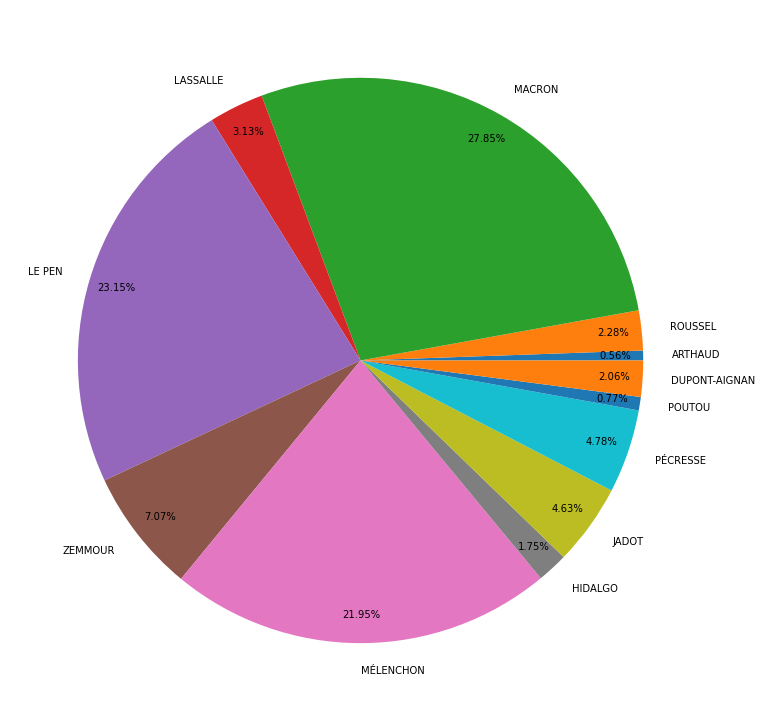

In [56]:
camembert = plt.pie(voixCandidat, labels=label, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance=0.9)
plt.rcParams["figure.figsize"] = [13, 13]
plt.show()

Avec l'abstention et les votes blancs :

In [57]:
voixCandidat1 = np.array([np.sum(df['Voix.1']), np.sum(df['Voix.2']), np.sum(df['Voix.3']), np.sum(df['Voix.4']), np.sum(df['Voix.5']), 
np.sum(df['Voix.6']), np.sum(df['Voix.7']), np.sum(df['Voix.8']), np.sum(df['Voix.9']), np.sum(df['Voix.10']), np.sum(df['Voix.11']), np.sum(df['Voix.12']), np.sum(df['Blancs']), totalAbs])

label1 = [df['Nom.1'][0], df['Nom.2'][0], df['Nom.3'][0], df['Nom.4'][0], df['Nom.5'][0], df['Nom.6'][0], df['Nom.7'][0], df['Nom.8'][0], 
df['Nom.9'][0], df['Nom.10'][0], df['Nom.11'][0], df['Nom.12'][0], 'BLANCS', 'ABSTENTION']

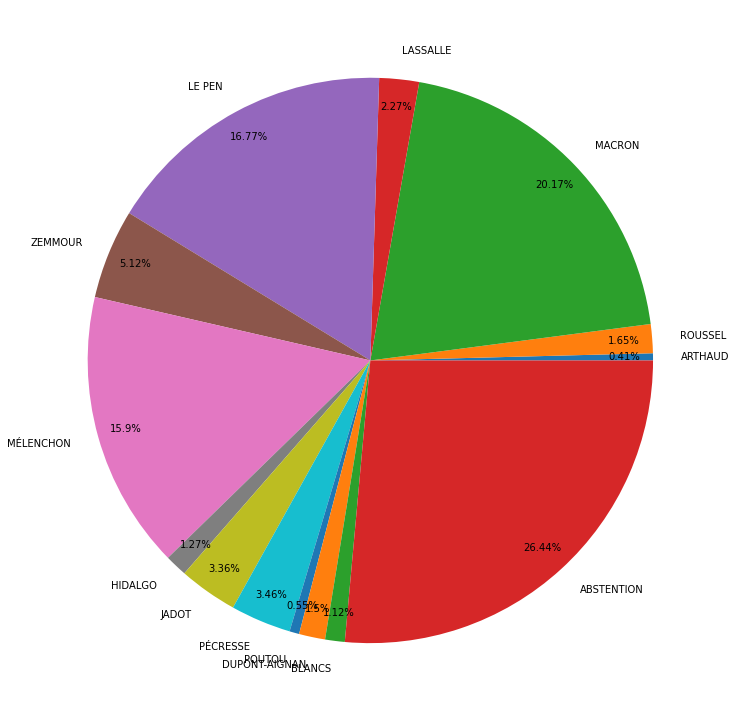

In [58]:
camembert = plt.pie(voixCandidat1, labels=label1, normalize = True, autopct = lambda voixCandidat: str(round(voixCandidat, 2)) + '%', pctdistance = 0.9, labeldistance = 1.1)
plt.rcParams["figure.figsize"] = [13, 13]
plt.show()

On peut voir que l'abstention a joué un rôle très important dans ce 1er tour.
En effet, n'importe quel candidat pourrait arriver 1er si il récupérait les voix de l'abstention

Voyons les résultats des candidats par départements

In [64]:
df_ZE_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.6', aggfunc = 'sum')
df_DAN_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.12', aggfunc = 'sum')
df_AN_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.1', aggfunc = 'sum')
df_HA_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.8', aggfunc = 'sum')
df_JY_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.9', aggfunc = 'sum')
df_LJ_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.4', aggfunc = 'sum')
df_LPM_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.5', aggfunc = 'sum')
df_ME_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.3', aggfunc = 'sum')
df_MJL_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.7', aggfunc = 'sum')
df_PV_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.10', aggfunc = 'sum')
df_PP_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.11', aggfunc = 'sum')
df_RF_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Voix.2', aggfunc = 'sum')
df_BLANC_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Blancs', aggfunc = 'sum')
df_ABS_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Abstentions', aggfunc = 'sum')
df_NUL_dep = pd.pivot_table(data = df, index = 'Libellé du département', values = 'Nuls', aggfunc = 'sum')

df_NUL_dep

,Nuls
Libellé du département,
Ain,1902
Aisne,2828
Allier,1790
Alpes-Maritimes,4007
Alpes-de-Haute-Provence,624
...,...
Vienne,2002
Vosges,1874
Wallis et Futuna,17


On va créer la fonction qui donne un camembert des résultats en fonction du département :

In [75]:
def camembertDepObs(depObs):
    voixCandidatDepObs = np.array([np.sum(df_AN_dep['Voix.1'][depObs]), np.sum(df_RF_dep['Voix.2'][depObs]), 
    np.sum(df_ME_dep['Voix.3'][depObs]), np.sum(df_LJ_dep['Voix.4'][depObs]), 
    np.sum(df_LPM_dep['Voix.5'][depObs]), np.sum(df_ZE_dep['Voix.6'][depObs]), 
    np.sum(df_MJL_dep['Voix.7'][depObs]), np.sum(df_HA_dep['Voix.8'][depObs]), 
    np.sum(df_JY_dep['Voix.9'][depObs]), np.sum(df_PV_dep['Voix.10'][depObs]), 
    np.sum(df_PP_dep['Voix.11'][depObs]), np.sum(df_DAN_dep['Voix.12'][depObs]),
    np.sum(df_BLANC_dep['Blancs'][depObs]), np.sum(df_ABS_dep['Abstentions'][depObs]), np.sum(df_NUL_dep['Nuls'][depObs])])

    labelDepObs = [df['Nom.1'][0], df['Nom.2'][0], df['Nom.3'][0], df['Nom.4'][0], df['Nom.5'][0], df['Nom.6'][0], df['Nom.7'][0], df['Nom.8'][0], 
    df['Nom.9'][0], df['Nom.10'][0], df['Nom.11'][0], df['Nom.12'][0], 'BLANCS', 'ABSTENTIONS', 'NULS']

    camembertDepObs = plt.pie(voixCandidatDepObs, labels=labelDepObs, normalize = True, autopct = lambda voixCandidatDepObs: str(round(voixCandidatDepObs, 2)) + '%', pctdistance=0.9)
    plt.rcParams["figure.figsize"] = [13, 13]
    plt.show()

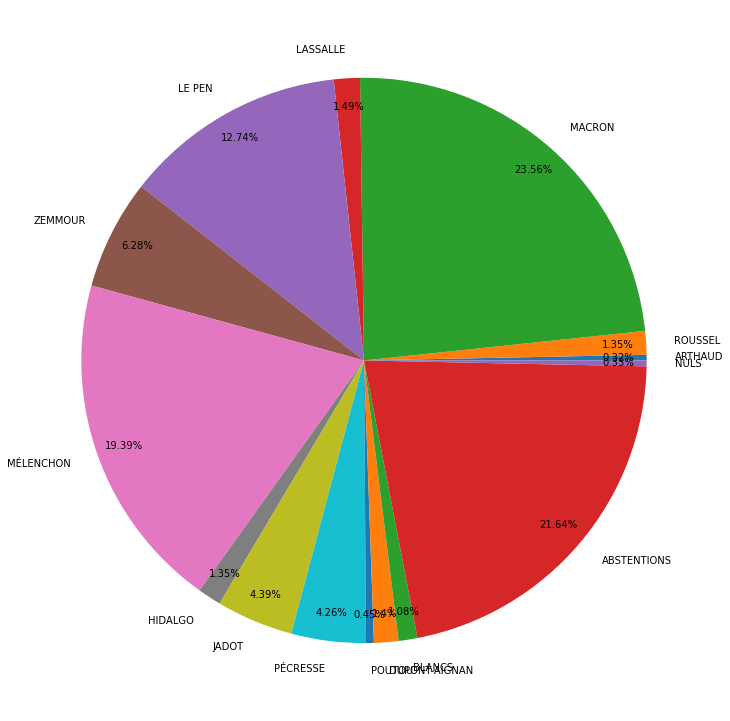

In [77]:
depObs = 'Rhône'

camembertDepObs(depObs)